# SVM test

In [1]:
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
from python_speech_features import ssc
import scipy.io.wavfile as wav
import pandas as pd
import numpy as np

## test sound

In [3]:
(rate1,sig1) = wav.read("../data/indoor_sound/indoor170719-001.wav")

In [4]:
(rate2,sig2) = wav.read("../data/drone_sound/drone170719-001.wav")

In [29]:
print(rate1,rate2)

44100 44100


In [4]:
print(sig1.shape)

(4537344,)


In [5]:
print(sig2.shape)

(11416576,)


In [6]:
print(int((sig1.shape[0]-1000)*0.8))

3629075


In [12]:
sig2.shape[0]/2

2283315.0

In [5]:
print(int(sig2.shape[0]/2))
half=int(sig2.shape[0]/2)
ninety=int(sig2.shape[0]*0.9)

5708288


In [6]:
sig2 = sig2[half:ninety]
print(sig2.shape[0]/2)

2283315.0


In [10]:
print(int(sig2.shape[0]/2))

2283315


In [11]:
sig2 = sig2[:5000000]

In [7]:
sig1_80_point = int((sig1.shape[0]-1000)*0.8)
sig2_80_point = int((sig2.shape[0]-1000)*0.8)
sig1_train = sig1[1000:sig1_80_point,]
sig1_test = sig1[sig1_80_point+1:,]
sig2_train = sig2[1000:sig2_80_point,]
sig2_test = sig2[sig2_80_point+1:,]
#train = np.concatenate((sig1_train, sig2_train), axis=0)
#test = np.concatenate((sig1_test, sig2_test), axis=0)

In [8]:
print(sig1.shape)
print(sig2.shape)

(4537344,)
(4566630,)


In [12]:
print(sig1)

[  0   0   0 ..., 390 454 505]


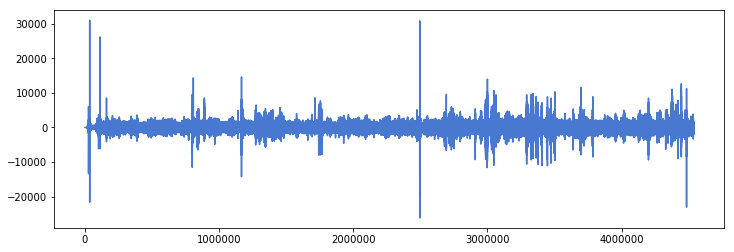

In [9]:
# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
plt.figure(figsize=(12,4))
plt.plot(sig1)
plt.show()

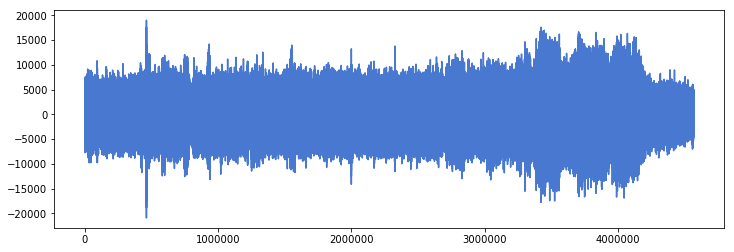

In [10]:
plt.figure(figsize=(12,4))
plt.plot(sig2)
plt.show()

### data 1, train data

In [12]:
mfcc_feat1_train = mfcc(sig1_train,rate1,nfft=2048,)
d_mfcc_feat1_train = delta(mfcc_feat1_train, 2)
fbank_feat1_train = logfbank(sig1_train,rate1, nfft=2048)
ssc_feat1_train = ssc(sig1_train,rate1, nfft=2048)
y1_train = np.zeros(mfcc_feat1_train.shape[0])

In [13]:
print(mfcc_feat1_train.shape)
print(d_mfcc_feat1_train.shape)
print(fbank_feat1_train.shape)
print(ssc_feat1_train.shape)

(8226, 13)
(8226, 13)
(8226, 26)
(8226, 26)


In [14]:
print(mfcc_feat1_train)

[[ -3.60436534e+01   0.00000000e+00  -3.20763172e-14 ...,  -3.27769755e-13
    0.00000000e+00   3.59484803e-13]
 [ -3.60436534e+01   0.00000000e+00  -3.20763172e-14 ...,  -3.27769755e-13
    0.00000000e+00   3.59484803e-13]
 [ -3.60436534e+01   0.00000000e+00  -3.20763172e-14 ...,  -3.27769755e-13
    0.00000000e+00   3.59484803e-13]
 ..., 
 [  1.50995028e+01  -3.73788889e+00   8.00095330e-01 ...,  -2.43584686e+00
    1.23978340e+00   1.98814398e+00]
 [  1.50393448e+01  -3.94899802e+00  -3.48417463e-01 ...,  -5.31985917e+00
   -2.15810761e+00  -1.14387017e-01]
 [  1.47172700e+01  -3.73521337e+00  -3.86663437e-02 ...,  -1.01576785e+01
   -5.80260294e+00   1.32945482e+00]]


### data 1, test data

In [15]:
mfcc_feat1_test = mfcc(sig1_test,rate1,nfft=2048,)
d_mfcc_feat1_test = delta(mfcc_feat1_test, 2)
fbank_feat1_test = logfbank(sig1_test,rate1, nfft=2048)
ssc_feat1_test = ssc(sig1_test,rate1, nfft=2048)
y1_test = np.zeros(mfcc_feat1_test.shape[0])

In [16]:
print(mfcc_feat1_test.shape)
print(d_mfcc_feat1_test.shape)
print(fbank_feat1_test.shape)
print(ssc_feat1_test.shape)

(2059, 13)
(2059, 13)
(2059, 26)
(2059, 26)


### data 2, train data

In [17]:
mfcc_feat2_train = mfcc(sig2_train,rate2,nfft=2048)
#np.savetxt('../data/mfcc2.txt', mfcc_feat2)
d_mfcc_feat2_train = delta(mfcc_feat2_train, 2)
#np.savetxt('../data/dmfcc2.csv', d_mfcc_feat2_train)
fbank_feat2_train = logfbank(sig2_train,rate2, nfft=2048)
#np.savetxt('../data/dmfcc2.csv', fbank_feat2_train)
ssc_feat2_train = ssc(sig2_train,rate2, nfft=2048)
#np.savetxt('../data/ssc2.csv', ssc_feat2_train)
y2_train = np.ones(mfcc_feat2_train.shape[0])

In [19]:
print(mfcc_feat1_train.shape)
print(d_mfcc_feat1_train.shape)
print(fbank_feat1_train.shape)
print(ssc_feat1_train.shape)

(8226, 13)
(8226, 13)
(8226, 26)
(8226, 26)


### data 2, test data

In [20]:
mfcc_feat2_test = mfcc(sig2_test,rate2,nfft=2048)
d_mfcc_feat2_test = delta(mfcc_feat2_test, 2)
fbank_feat2_test = logfbank(sig2_test,rate2, nfft=2048)
ssc_feat2_test = ssc(sig2_test,rate2, nfft=2048)
y2_test = np.ones(mfcc_feat2_test.shape[0])

In [21]:
print(mfcc_feat2_test.shape)
print(d_mfcc_feat2_test.shape)
print(fbank_feat2_test.shape)
print(ssc_feat2_test.shape)

(2072, 13)
(2072, 13)
(2072, 26)
(2072, 26)


### concatenated

In [22]:
# mfcc
mfcc_train = np.concatenate((mfcc_feat1_train ,mfcc_feat2_train), axis=0)
mfcc_test = np.concatenate((mfcc_feat1_test ,mfcc_feat2_test), axis=0)

# d_mfcc
d_mfcc_train = np.concatenate((d_mfcc_feat1_train, d_mfcc_feat2_train), axis=0)
d_mfcc_test = np.concatenate((d_mfcc_feat1_test, d_mfcc_feat2_test), axis=0)

# fbank
fbank_train = np.concatenate((fbank_feat1_train, fbank_feat2_train), axis=0)
fbank_test = np.concatenate((fbank_feat1_test, fbank_feat2_test), axis=0)

# ssc
ssc_train = np.concatenate((ssc_feat1_train, ssc_feat2_train), axis=0)
ssc_test = np.concatenate((ssc_feat1_test, ssc_feat2_test), axis=0)

In [23]:
y_train = np.concatenate((y1_train,y2_train), axis=0)
y_test = np.concatenate((y1_test,y2_test), axis=0)
print(y_train.shape)
print(y_test.shape)

(16505,)
(4131,)


In [24]:
print(mfcc_train.shape, y_train.shape)

(16505, 13) (16505,)


In [25]:
from sklearn import svm
clf_mfcc = svm.SVC()
clf_mfcc.fit(mfcc_train, y_train)
clf_d_mfcc = svm.SVC()
clf_d_mfcc.fit(d_mfcc_train, y_train)
clf_fbank = svm.SVC()
clf_fbank.fit(fbank_train, y_train)
clf_ssc = svm.SVC()
clf_ssc.fit(ssc_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
print(mfcc_train.shape)
print(mfcc_test.shape)
y_pred_mfcc = clf_mfcc.predict(mfcc_test)
y_pred_d_mfcc = clf_d_mfcc.predict(d_mfcc_test)
y_pred_fbank = clf_fbank.predict(fbank_test)
y_pred_ssc = clf_ssc.predict(ssc_test)


(16505, 13)
(4131, 13)


In [27]:
print(y_pred_mfcc)

[ 0.  0.  0. ...,  1.  1.  1.]


In [ ]:
print(np.)

In [28]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_mfcc, average='macro'))
print(f1_score(y_test, y_pred_d_mfcc, average='macro'))
print(f1_score(y_test, y_pred_fbank, average='macro'))
print(f1_score(y_test, y_pred_ssc, average='macro'))

0.688344021124
0.740303479492
0.999273777459
0.334031920039


/Users/bowonyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
